#**CMPT 3510**

**Team Members:**


*   Sandesh Khanal
*   Manoj Bhatt
*   Rajdeep Kaur
*   Navjot Kaur


**Problem Statement:**
*Based on NPRI data, predict the proportion of pollutant releases to disposals 5 years ahead.*

**Description:**
In this phase, we are exploring the NPRI dataset to understand trends in pollutant releases and disposals over time. Instead of using machine learning, we manually analyze the data, create time-series summaries, and reason about future outcomes.

**We will:**



*   Transform the dataset into a time-series structure by grouping yearly releases and disposals.


*   Calculate the proportion of releases to disposals and add helper features like rolling averages and percent changes.

*   Visualize trends to understand patterns over the years.



*   Make a simple manual prediction for the proportion in 5 years (2027) using logical reasoning and observed trends.







#1. Import Libraries

In [ ]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#2. Load Excel Data

In [ ]:
# Loading the xlxs data file
xls = pd.ExcelFile('/content/NPRI_2000-2022.xlsx')

In [ ]:
## Load releases, disposals/transfers, and comments sheets from the NPRI Excel file
df1 = pd.read_excel(xls, 'Releases 2000-2020')
df2 = pd.read_excel(xls, 'Disposals and Transfers 00-20')
df3 = pd.read_excel(xls, 'Comments')


#3. Initial Data Overview

In [ ]:
# Displays summary information
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737516 entries, 0 to 737515
Data columns (total 28 columns):
 #   Column                                                 Non-Null Count   Dtype  
---  ------                                                 --------------   -----  
 0   Reporting_Year / Année                                 737516 non-null  int64  
 1   NPRI_ID / No_INRP                                      737516 non-null  int64  
 2   Number of employees                                    736900 non-null  object 
 3   Company_Name / Dénomination_sociale_de_l'entreprise    737516 non-null  object 
 4   Facility_Name / Installation                           736340 non-null  object 
 5   NAICS / Code_SCIAN                                     737516 non-null  int64  
 6   NAICS Title / Titre Code_SCIAN                         737516 non-null  object 
 7   PROVINCE                                               737516 non-null  object 
 8   City                              

In this cell we are adding a description table for df1

In [ ]:
#Display information summary of df2
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191645 entries, 0 to 191644
Data columns (total 41 columns):
 #   Column                                                                                       Non-Null Count   Dtype  
---  ------                                                                                       --------------   -----  
 0   Reporting_Year / Année                                                                       191645 non-null  int64  
 1   NPRI_ID / No_INRP                                                                            191645 non-null  int64  
 2   Number of employees                                                                          191551 non-null  object 
 3   Company_Name / Dénomination_sociale_de_l'entreprise                                          191645 non-null  object 
 4   Facility_Name / Installation                                                                 191019 non-null  object 
 5   NAICS / Code_SCIAN     

In [ ]:
#Display information summary of df3
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363310 entries, 0 to 363309
Data columns (total 14 columns):
 #   Column                                                     Non-Null Count   Dtype 
---  ------                                                     --------------   ----- 
 0   Reporting_Year / Année                                     363310 non-null  int64 
 1   NPRI_ID / No_INRP                                          363310 non-null  int64 
 2   Company_Name / Dénomination_sociale_de_l'entreprise        363310 non-null  object
 3   Facility_Name / Installation                               359305 non-null  object
 4   NAICS / Code_SCIAN                                         363310 non-null  int64 
 5   NAICS Title EN / Titre Code SCIAN EN                       363294 non-null  object
 6   NAICS Title FR / Titre Code SCIAN FR                       363294 non-null  object
 7   PROVINCE                                                   363310 non-null  object
 8   CAS_

#4. Check Missing Values

In [ ]:
#Check the null value in each columns
df1.isnull().sum()

,0
Reporting_Year / Année,0
NPRI_ID / No_INRP,0
Number of employees,616
Company_Name / Dénomination_sociale_de_l'entreprise,0
Facility_Name / Installation,1176
NAICS / Code_SCIAN,0
NAICS Title / Titre Code_SCIAN,0
PROVINCE,0
City,90764
Latitude,4082


#5. Create a Clean Copy of df1

In [ ]:
# Create a copy of df1 to df1_clean and display the first 5 rows
df1_clean = df1.copy()
df1_clean.head(5)

,Reporting_Year / Année,NPRI_ID / No_INRP,Number of employees,Company_Name / Dénomination_sociale_de_l'entreprise,Facility_Name / Installation,NAICS / Code_SCIAN,NAICS Title / Titre Code_SCIAN,PROVINCE,City,Latitude,...,Release to Air - Spills,Release to Air - Stack / Point,Release to Air - Storage / Handling,Releases to Land - Leaks,Releases to Land - Other,Releases to Land - Spills,Releases to Water Bodies - Direct Discharges,Releases to Water Bodies - Leaks,Releases to Water Bodies - Spills,Sum of release to all media (<1tonne)
0,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,...,NaN,5.200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,...,NaN,113.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
3,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,...,NaN,7.670,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,...,NaN,0.665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#6. Check Null Values in Clean Data

In [ ]:
#Check for null values in clean data
df1_clean.isnull().sum()

,0
Reporting_Year / Année,0
NPRI_ID / No_INRP,0
Number of employees,616
Company_Name / Dénomination_sociale_de_l'entreprise,0
Facility_Name / Installation,1176
NAICS / Code_SCIAN,0
NAICS Title / Titre Code_SCIAN,0
PROVINCE,0
City,90764
Latitude,4082


#7. Inspect Columns and Data Types

In [ ]:
#Displaying the columns
print(df1.columns)

Index(['Reporting_Year / Année', 'NPRI_ID / No_INRP', 'Number of employees',
       'Company_Name / Dénomination_sociale_de_l'entreprise',
       'Facility_Name / Installation', 'NAICS / Code_SCIAN',
       'NAICS Title / Titre Code_SCIAN', 'PROVINCE', 'City', 'Latitude',
       'Longitude', 'CAS_Number / No_CAS',
       'Substance Name (English) / Nom de substance (Anglais)',
       'Units / Unités', 'Estimation_Method / Méthode_d’estimation',
       'Release to Air - Fugitive', 'Release to Air - Other Non-Point ',
       'Release to Air - Road dust  ', 'Release to Air - Spills ',
       'Release to Air - Stack / Point  ',
       'Release to Air - Storage / Handling ', 'Releases to Land - Leaks',
       'Releases to Land - Other ', 'Releases to Land - Spills ',
       'Releases to Water Bodies - Direct Discharges ',
       'Releases to Water Bodies - Leaks',
       'Releases to Water Bodies - Spills ',
       'Sum of release to all media (<1tonne)'],
      dtype='object')


In [ ]:
#Check for null values in each columns
df1.isnull().sum()

,0
Reporting_Year / Année,0
NPRI_ID / No_INRP,0
Number of employees,616
Company_Name / Dénomination_sociale_de_l'entreprise,0
Facility_Name / Installation,1176
NAICS / Code_SCIAN,0
NAICS Title / Titre Code_SCIAN,0
PROVINCE,0
City,90764
Latitude,4082


In [ ]:
#Check for datatypes in each columns
df1.dtypes

,0
Reporting_Year / Année,int64
NPRI_ID / No_INRP,int64
Number of employees,object
Company_Name / Dénomination_sociale_de_l'entreprise,object
Facility_Name / Installation,object
NAICS / Code_SCIAN,int64
NAICS Title / Titre Code_SCIAN,object
PROVINCE,object
City,object
Latitude,float64


#8. Preview Cleaned Data

In [ ]:
## Make a copy of df1 as df1_clean and display the first 35 rows
df1_clean = df1.copy()
df1_clean.head(35)

,Reporting_Year / Année,NPRI_ID / No_INRP,Number of employees,Company_Name / Dénomination_sociale_de_l'entreprise,Facility_Name / Installation,NAICS / Code_SCIAN,NAICS Title / Titre Code_SCIAN,PROVINCE,City,Latitude,...,Release to Air - Spills,Release to Air - Stack / Point,Release to Air - Storage / Handling,Releases to Land - Leaks,Releases to Land - Other,Releases to Land - Spills,Releases to Water Bodies - Direct Discharges,Releases to Water Bodies - Leaks,Releases to Water Bodies - Spills,Sum of release to all media (<1tonne)
0,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,...,NaN,5.200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,...,NaN,113.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN
3,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,...,NaN,7.670,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,...,NaN,0.665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN
6,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN
7,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,...,NaN,0.452,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,...,NaN,NaN,NaN,NaN,NaN,NaN,2.61,NaN,NaN,NaN
9,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,...,NaN,NaN,NaN,NaN,NaN,NaN,1.26,NaN,NaN,NaN


In [ ]:
# Display all column names of the cleaned dataframe
df1_clean.columns

# Check the number of missing values in each column of the cleaned dataframe
df1_clean.isnull().sum()

,0
Reporting_Year / Année,0
NPRI_ID / No_INRP,0
Number of employees,616
Company_Name / Dénomination_sociale_de_l'entreprise,0
Facility_Name / Installation,1176
NAICS / Code_SCIAN,0
NAICS Title / Titre Code_SCIAN,0
PROVINCE,0
City,90764
Latitude,4082


#9. Remove Unnecessary Columns

In [ ]:
# Remove unwanted columns
df1_clean.drop([
    'Company Name',
    'Facility_Name / Installation',
    'Address',
    'City',
    'Latitude',
    'Longitude',
    'Postal Code',
    'Province',
    'Comment / Commentaires'
], axis=1, inplace=True, errors='ignore')

#10. Handle Missing Values

In [ ]:
#Replace all null values with 0
df1_clean.fillna(0, inplace=True)

#11. Explore Cleaned Data

In [ ]:
# Display summary information about df1_clean including data types and non-null counts
df1_clean.info()

# Get the total number of missing values in the entire cleaned dataframe
df1_clean.isnull().sum().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737516 entries, 0 to 737515
Data columns (total 24 columns):
 #   Column                                                 Non-Null Count   Dtype  
---  ------                                                 --------------   -----  
 0   Reporting_Year / Année                                 737516 non-null  int64  
 1   NPRI_ID / No_INRP                                      737516 non-null  int64  
 2   Number of employees                                    737516 non-null  object 
 3   Company_Name / Dénomination_sociale_de_l'entreprise    737516 non-null  object 
 4   NAICS / Code_SCIAN                                     737516 non-null  int64  
 5   NAICS Title / Titre Code_SCIAN                         737516 non-null  object 
 6   PROVINCE                                               737516 non-null  object 
 7   CAS_Number / No_CAS                                    737516 non-null  object 
 8   Substance Name (English) / Nom de 

np.int64(0)

In [ ]:
# Show the data types of each column in df1_clean
df1_clean.dtypes
#Show first few rows of the dataset
df1_clean.head()

,Reporting_Year / Année,NPRI_ID / No_INRP,Number of employees,Company_Name / Dénomination_sociale_de_l'entreprise,NAICS / Code_SCIAN,NAICS Title / Titre Code_SCIAN,PROVINCE,CAS_Number / No_CAS,Substance Name (English) / Nom de substance (Anglais),Units / Unités,...,Release to Air - Spills,Release to Air - Stack / Point,Release to Air - Storage / Handling,Releases to Land - Leaks,Releases to Land - Other,Releases to Land - Spills,Releases to Water Bodies - Direct Discharges,Releases to Water Bodies - Leaks,Releases to Water Bodies - Spills,Sum of release to all media (<1tonne)
0,2000,1,440,Alberta-Pacific Forest Industries Inc.,322112,Chemical pulp mills,AB,10049-04-4,Chlorine dioxide,tonnes,...,0.0,5.200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2000,1,440,Alberta-Pacific Forest Industries Inc.,322112,Chemical pulp mills,AB,67-56-1,Methanol,tonnes,...,0.0,113.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2000,1,440,Alberta-Pacific Forest Industries Inc.,322112,Chemical pulp mills,AB,67-66-3,Chloroform,tonnes,...,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2000,1,440,Alberta-Pacific Forest Industries Inc.,322112,Chemical pulp mills,AB,75-07-0,Acetaldehyde,tonnes,...,0.0,7.670,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2000,1,440,Alberta-Pacific Forest Industries Inc.,322112,Chemical pulp mills,AB,7647-01-0,Hydrochloric acid,tonnes,...,0.0,0.665,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#12. Generate Descriptive Statistics

In [ ]:
# Generate descriptive statistics
df1_clean.describe()

,Reporting_Year / Année,NPRI_ID / No_INRP,NAICS / Code_SCIAN,Release to Air - Fugitive,Release to Air - Other Non-Point,Release to Air - Road dust,Release to Air - Spills,Release to Air - Stack / Point,Release to Air - Storage / Handling,Releases to Land - Leaks,Releases to Land - Other,Releases to Land - Spills,Releases to Water Bodies - Direct Discharges,Releases to Water Bodies - Leaks,Releases to Water Bodies - Spills,Sum of release to all media (<1tonne)
count,737516.000000,737516.000000,737516.000000,737516.000000,737516.000000,737516.000000,737516.000000,737516.000000,737516.000000,737516.000000,737516.000000,737516.000000,737516.000000,737516.000000,737516.000000,737516.000000
mean,2012.267601,11248.268386,289175.551820,10.367992,3.829248,4.746724,0.021693,100.359815,2.545150,0.000440,3.962627,0.030854,5.701059,0.000714,0.730422,0.009600
std,6.400156,9352.868266,94788.542197,329.193552,333.808062,173.785236,2.486890,1682.190688,72.269703,0.091653,282.476340,7.279564,156.478695,0.170531,345.372258,0.680793
min,2000.000000,1.000000,111120.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2007.000000,3775.000000,211113.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2012.000000,7114.000000,312140.000000,0.000000,0.000000,0.000000,0.000000,0.558050,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2018.000000,18093.000000,327120.000000,0.000000,0.000000,0.000000,0.000000,19.584025,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2022.000000,306556.000000,913910.000000,58433.900000,91138.200000,39992.961045,1554.400000,235907.000000,17883.110000,39.058000,152270.000000,4500.100000,39991.000000,82.400000,259050.000000,582.000000


#13. Select Release Columns

In [ ]:
# Save the name of the reporting year column in a variable
year_col = 'Reporting_Year / Année'

In [ ]:
# Create a list of all columns related to releases, and add a specific small-release column if it exists
release_cols = [c for c in df1_clean.columns if c.startswith('Release') or c.startswith('Releases')]
if 'Sum of release to all media (<1tonne)' in df1_clean.columns:
    release_cols.append('Sum of release to all media (<1tonne)')

#14. Prepare df1_clean for Analysis

In [ ]:
# Make a copy of df1 as df1_clean and show the first 35 rows
df1_clean = df1.copy()
df1_clean.head(35)

,Reporting_Year / Année,NPRI_ID / No_INRP,Number of employees,Company_Name / Dénomination_sociale_de_l'entreprise,Facility_Name / Installation,NAICS / Code_SCIAN,NAICS Title / Titre Code_SCIAN,PROVINCE,City,Latitude,...,Release to Air - Spills,Release to Air - Stack / Point,Release to Air - Storage / Handling,Releases to Land - Leaks,Releases to Land - Other,Releases to Land - Spills,Releases to Water Bodies - Direct Discharges,Releases to Water Bodies - Leaks,Releases to Water Bodies - Spills,Sum of release to all media (<1tonne)
0,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,...,NaN,5.200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,...,NaN,113.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN
3,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,...,NaN,7.670,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,...,NaN,0.665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN
6,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN
7,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,...,NaN,0.452,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,...,NaN,NaN,NaN,NaN,NaN,NaN,2.61,NaN,NaN,NaN
9,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,...,NaN,NaN,NaN,NaN,NaN,NaN,1.26,NaN,NaN,NaN


In [ ]:
# Make a copy of df1 as df1_clean and replace all missing values with 0
df1_clean = df1.copy()
df1_clean.fillna(0, inplace=True)

print("Release cols found:", len(release_cols))
print(release_cols[:8])

# Display summary information about df1_clean
df1_clean.info()

Release cols found: 13
['Release to Air - Fugitive', 'Release to Air - Other Non-Point ', 'Release to Air - Road dust  ', 'Release to Air - Spills ', 'Release to Air - Stack / Point  ', 'Release to Air - Storage / Handling ', 'Releases to Land - Leaks', 'Releases to Land - Other ']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737516 entries, 0 to 737515
Data columns (total 28 columns):
 #   Column                                                 Non-Null Count   Dtype  
---  ------                                                 --------------   -----  
 0   Reporting_Year / Année                                 737516 non-null  int64  
 1   NPRI_ID / No_INRP                                      737516 non-null  int64  
 2   Number of employees                                    737516 non-null  object 
 3   Company_Name / Dénomination_sociale_de_l'entreprise    737516 non-null  object 
 4   Facility_Name / Installation                           737516 non-null  object 
 5   NAICS 

#15. Calculate Yearly Total Releases

In [ ]:
# Calculate the total releases per year by summing all release-related columns
rel_yearly = (
    df1_clean
    .groupby('Reporting_Year / Année')[release_cols]
    .sum(numeric_only=True)
    .sum(axis=1)
    .rename('total_releases')
)

print(rel_yearly.head())
print(rel_yearly.tail())

Reporting_Year / Année
2000    7.369861e+05
2001    7.910157e+05
2002    5.719252e+06
2003    5.790316e+06
2004    5.739917e+06
Name: total_releases, dtype: float64
Reporting_Year / Année
2018    3.872069e+06
2019    3.827758e+06
2020    3.526746e+06
2021    3.594560e+06
2022    3.581907e+06
Name: total_releases, dtype: float64


#16. Clean df2 for Disposals

In [ ]:
# Make a copy of df2 as df2_clean, replace all missing values with 0, and display its summary info

df2_clean = df2.copy()
df2_clean.fillna(0, inplace=True)
df2_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191645 entries, 0 to 191644
Data columns (total 41 columns):
 #   Column                                                                                       Non-Null Count   Dtype  
---  ------                                                                                       --------------   -----  
 0   Reporting_Year / Année                                                                       191645 non-null  int64  
 1   NPRI_ID / No_INRP                                                                            191645 non-null  int64  
 2   Number of employees                                                                          191645 non-null  object 
 3   Company_Name / Dénomination_sociale_de_l'entreprise                                          191645 non-null  object 
 4   Facility_Name / Installation                                                                 191645 non-null  object 
 5   NAICS / Code_SCIAN     

#17. Select Disposal Columns

In [ ]:
# Create a list of all columns in df2_clean related to disposals and waste handling

disposal_cols = [
    column for column in df2_clean.columns if (
        "Disposal" in column or
        "Waste Rock" in column or
        "Tailings" in column or
        "Underground Injection" in column or
        "Landfill" in column or
        "Land Treatment" in column
    )
]

#18. Calculate Yearly Total Disposals

In [ ]:
# Calculate the total disposals per year by summing all disposal-related columns

disposal_yearly = (
    df2_clean
    .groupby('Reporting_Year / Année')[disposal_cols]
    .sum(numeric_only=True)
    .sum(axis=1)
    .rename('total_disposals')
)

#19. Combine Releases and Disposals

In [ ]:
# Combine yearly total releases and disposals into one dataframe, clean it, and rename the year column
year_df = (
    pd.concat([rel_yearly, disposal_yearly], axis=1)
      .dropna()
      .reset_index()
      .rename(columns={'Reporting_Year / Année': 'Year'})
)

# Calculate the proportion of releases to disposals, handling zero disposals
year_df['Proportion'] = year_df['total_releases'] / year_df['total_disposals'].replace({0: np.nan})

# Create helper features: 3-year rolling average, year-to-year difference, and percent change of the proportion
year_df['Proportion_rolling3'] = year_df['Proportion'].rolling(3, min_periods=1).mean()
year_df['Proportion_difference'] = year_df['Proportion'].diff()
year_df['Proportion_percent_change'] = year_df['Proportion'].pct_change() * 100

year_df.head(10)

,Year,total_releases,total_disposals,Proportion,Proportion_rolling3,Proportion_difference,Proportion_percent_change
0,2000,7.369861e+05,4.196486e+05,1.756198,1.756198,NaN,NaN
1,2001,7.910157e+05,4.942913e+05,1.600303,1.678250,-0.155895,-8.876872
2,2002,5.719252e+06,5.544268e+06,1.031561,1.462687,-0.568741,-35.539610
3,2003,5.790316e+06,9.018299e+06,0.642063,1.091309,-0.389498,-37.758136
4,2004,5.739917e+06,9.157505e+06,0.626799,0.766808,-0.015264,-2.377308
5,2005,5.507665e+06,9.548419e+06,0.576814,0.615226,-0.049985,-7.974619
6,2006,5.536423e+06,5.012385e+07,0.110455,0.438023,-0.466359,-80.850882
7,2007,5.652724e+06,5.685085e+07,0.099431,0.262233,-0.011024,-9.980625
8,2008,5.251022e+06,5.847639e+07,0.089797,0.099894,-0.009633,-9.688630
9,2009,4.621315e+06,5.753937e+07,0.080316,0.089848,-0.009482,-10.558896


###  I. Time-Series Data Transformation

For this part, our team wanted to turn the raw facility-level data into something we could actually analyze over time.

**What we did:**  
- We grouped the data by year and added up all the releases and disposals for each year.  
- Then we combined these totals into `year_df` so that we had a clean table showing the yearly totals and proportions.  
- We also added a few helper features, like a 3-year rolling average, year-to-year differences, and percent changes, to help us spot trends and make predictions later.

This gives us a chronological view of the data and makes it easier to see how things have changed over the years.


#20. Visualize Releases vs Disposals

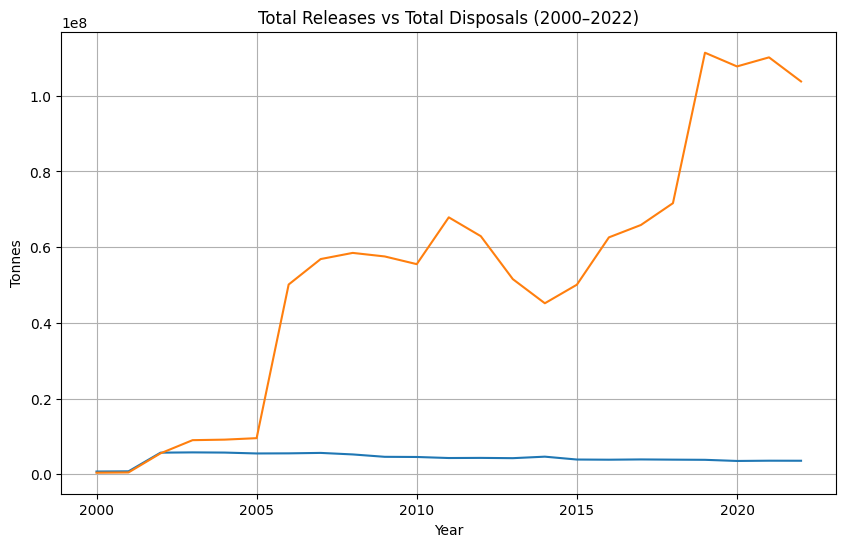

In [ ]:
# Plot total releases and total disposals per year from 2000 to 2022
plt.figure(figsize=(10,6))
plt.plot(year_df['Year'], year_df['total_releases'], label='Total Releases')
plt.plot(year_df['Year'], year_df['total_disposals'], label='Total Disposals')
plt.title('Total Releases vs Total Disposals (2000–2022)')
plt.xlabel('Year')
plt.ylabel('Tonnes')
plt.grid()
plt.show()

#21. Visualize Proportion Over Time

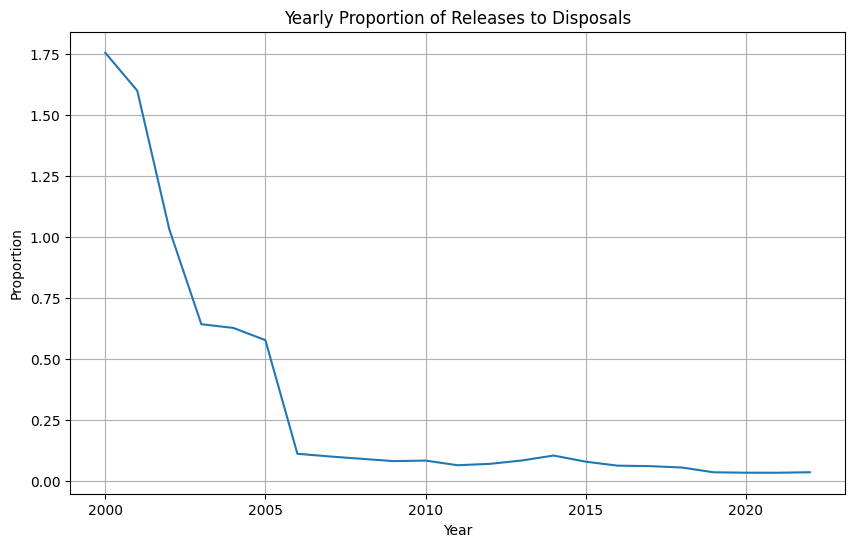

In [ ]:
# Plot the yearly proportion of releases to disposals with labels, title, and grid
plt.figure(figsize=(10,6))
plt.plot(year_df['Year'], year_df['Proportion'], label='Proportion (Releases ÷ Disposals)')
plt.title('Yearly Proportion of Releases to Disposals')
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.grid()
plt.show()

#22. Smoothed Trend with Rolling Average

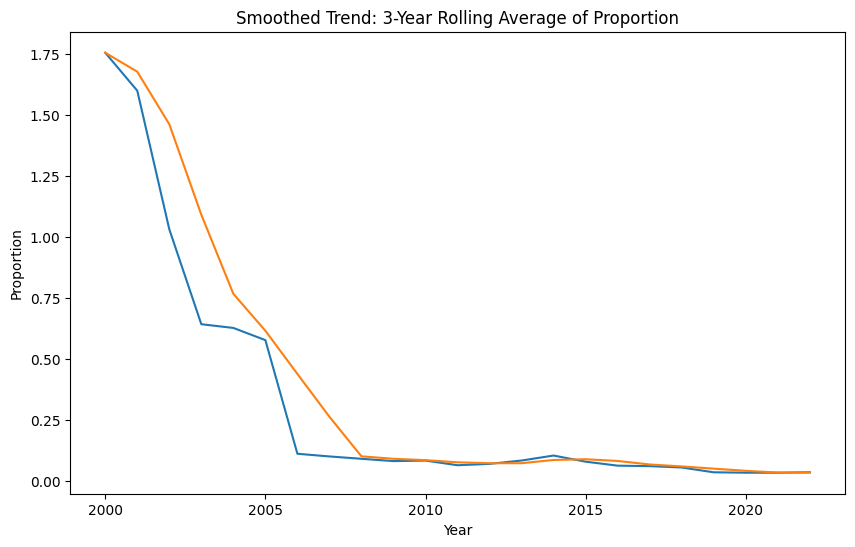

In [ ]:
# Plot yearly proportion of releases to disposals along with its 3-year rolling average to show smoothed trend
plt.figure(figsize=(10,6))
plt.plot(year_df['Year'], year_df['Proportion'], label='Yearly Proportion')
plt.plot(year_df['Year'], year_df['Proportion_rolling3'], label='3-Year Rolling Average')
plt.title('Smoothed Trend: 3-Year Rolling Average of Proportion')
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.show()

#23. Year-over-Year Percent Change

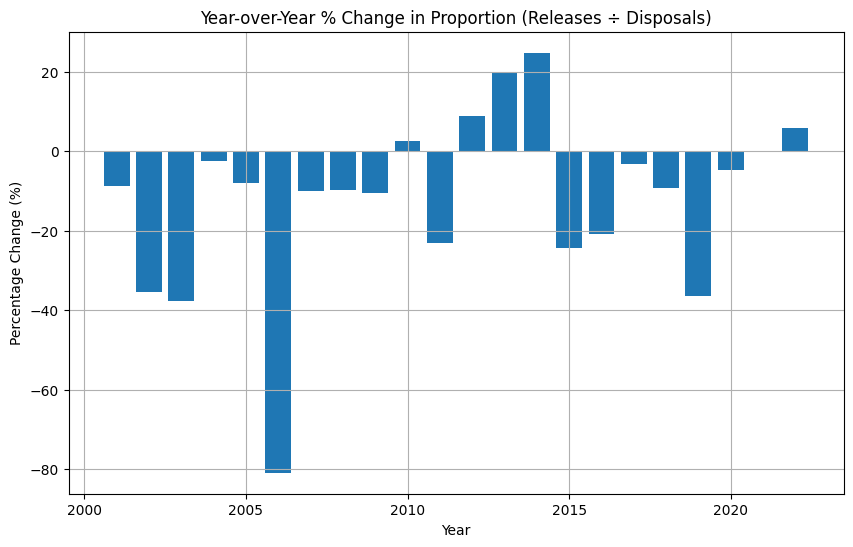

In [ ]:
# Plot a bar chart showing the year-over-year percent change in the proportion of releases to disposals
plt.figure(figsize=(10,6))
plt.bar(year_df['Year'], year_df['Proportion_percent_change'])
plt.title('Year-over-Year % Change in Proportion (Releases ÷ Disposals)')
plt.xlabel('Year')
plt.ylabel('Percentage Change (%)')
plt.grid()
plt.show()

#24. Distribution of Stack/Point Releases

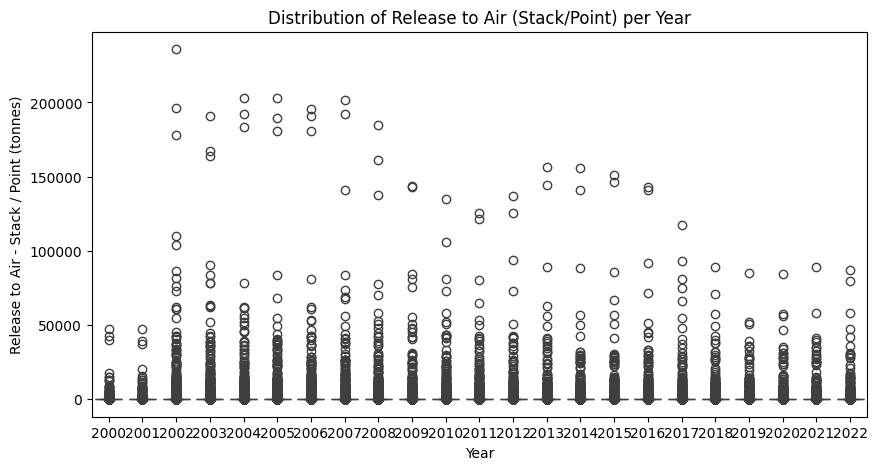

In [ ]:
# Create a boxplot showing the yearly distribution of 'Release to Air - Stack / Point' values
plt.figure(figsize=(10, 5))
sns.boxplot(x=df1_clean['Reporting_Year / Année'],
            y=df1_clean['Release to Air - Stack / Point  '])
plt.title('Distribution of Release to Air (Stack/Point) per Year')
plt.xlabel('Year')
plt.ylabel('Release to Air - Stack / Point (tonnes)')
plt.show()

#25. Fugitive Air Releases

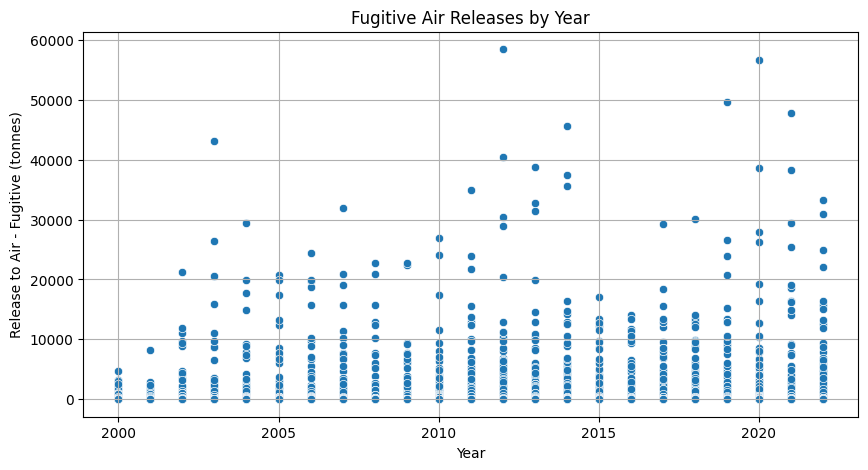

In [ ]:
# Create a scatter plot showing 'Release to Air - Fugitive' values for each year
plt.figure(figsize=(10,5))
sns.scatterplot(
    x=df1_clean['Reporting_Year / Année'],y=df1_clean['Release to Air - Fugitive'],
)
plt.title('Fugitive Air Releases by Year')
plt.xlabel('Year')
plt.ylabel('Release to Air - Fugitive (tonnes)')
plt.grid(True)
plt.show()

#26. Log-Transformed Proportion

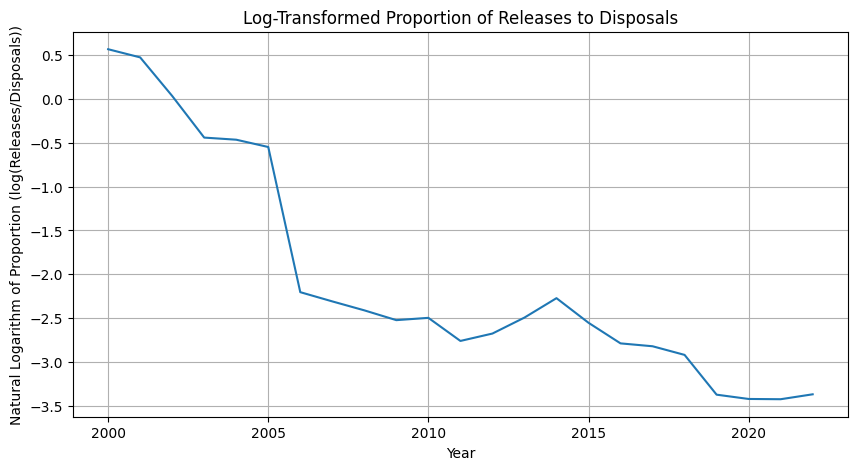

In [ ]:
# Plot the natural log of the proportion of releases to disposals over the years to visualize trends on a log scale
plt.figure(figsize=(10,5))
plt.plot(
    year_df['Year'],
    np.log(year_df['Proportion'])
)

plt.title('Log-Transformed Proportion of Releases to Disposals')
plt.xlabel('Year')
plt.ylabel('Natural Logarithm of Proportion (log(Releases/Disposals))')
plt.grid(True)
plt.show()

#27. Simple 5-Year Prediction

In [ ]:
# Get the last known proportion value
last_proportion = year_df['Proportion'].tail(1).values[0]

# Assume a small annual growth rate
annual_growth = 0.0025  # 0.25%

# Number of years to predict ahead
years_ahead = 5

# Calculate predicted proportion for 2027
predicted_2027 = last_proportion * (1 + annual_growth) ** years_ahead

print("Predicted Proportion in 2027:", predicted_2027)


Predicted Proportion in 2027: 0.034956099750125695


### II. Manual Prediction and Reasoning

For this part, our team made a simple, hand-calculated prediction without using any machine learning models.

We started with the most recent proportion of releases to disposals (2022).

To account for a small trend, we assumed a gentle annual growth of 0.25%, based on the 3-year rolling average trend.

Using a simple compounding formula, we projected this value 5 years ahead to 2027.

Result:
The predicted proportion for 2027 is approximately 0.035.

This gave us a quick, team-made baseline that we can later compare to what a machine learning model predicts.


#III. Reflection and Next Steps

**Observations:**
The log-transformed data shows a sharp downward trend, especially between 2000 and 2006, followed by a slower decline.
Without the log transform, the proportions appeared more erratic, making the downward pattern harder to see.

---



**What this means for modeling**:

The strong downward trend suggests the data is time-dependent, so models should include lag features (e.g., previous year’s proportion) and rolling averages.

The log transformation helps stabilize fluctuations and makes long-term patterns easier for models to capture.


---


**Conclusion:**
Even with a simple manual forecast, we can observe clear declining patterns that a machine learning model could learn from.
This insight helps guide feature selection and transformation choices for Phase 2.





# PHASE 2 — TIME SERIES REGRESSION

1. Load and Prepare NPRI Dataset


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
# Load NPRI Excel sheets
xls = pd.ExcelFile("/content/NPRI_2000-2022.xlsx")

# Read the Releases and Disposals sheets
df1 = pd.read_excel(xls, "Releases 2000-2020")
df2 = pd.read_excel(xls, "Disposals and Transfers 00-20")

print(df1.shape, df2.shape)


(737516, 28) (191645, 41)


2. Reconstruct Time-Series Dataset

In [ ]:
year_col = 'Reporting_Year / Année'

# Identify all columns that represent releases
release_cols = [c for c in df1.columns if c.startswith("Release") or c.startswith("Releases")]

# Add small-release column if present
if "Sum of release to all media (<1tonne)" in df1.columns:
    release_cols.append("Sum of release to all media (<1tonne)")

# Total yearly releases
rel_yearly = (
    df1.fillna(0)
       .groupby(year_col)[release_cols]
       .sum(numeric_only=True)
       .sum(axis=1)
       .rename("total_releases")
)

# Identify columns related to disposals
disposal_cols = [
    c for c in df2.columns
    if any(x in c for x in [
        "Disposal", "Landfill", "Waste Rock",
        "Tailings", "Land Treatment", "Underground Injection"
    ])
]

# Compute total disposals per year
disp_yearly = (
    df2.fillna(0)
       .groupby(year_col)[disposal_cols]
       .sum(numeric_only=True)
       .sum(axis=1)
       .rename("total_disposals")
)

# Combine yearly totals into one dataset
year_df = (
    pd.concat([rel_yearly, disp_yearly], axis=1)
      .reset_index()
      .rename(columns={year_col:"Year"})
)

year_df["Proportion"] = year_df["total_releases"] / year_df["total_disposals"]

year_df.head()


,Year,total_releases,total_disposals,Proportion
0,2000,7.369861e+05,4.196486e+05,1.756198
1,2001,7.910157e+05,4.942913e+05,1.600303
2,2002,5.719252e+06,5.544268e+06,1.031561
3,2003,5.790316e+06,9.018299e+06,0.642063
4,2004,5.739917e+06,9.157505e+06,0.626799


3. Feature Engineering

In [ ]:
# Target we want to predict for each year
year_df["Proportion"] = year_df["total_releases"] / year_df["total_disposals"]

# Use ONLY past information for features

# 1-year lag: Proportion in previous year (t-1)
year_df["Lag_1"] = year_df["Proportion"].shift(1)

# 3-year rolling mean of PAST proportions (based on Lag_1)
year_df["Rolling_3yr"] = year_df["Lag_1"].rolling(3).mean()

# Difference between past values: (t-1) minus (t-2)
year_df["Difference"] = year_df["Lag_1"] - year_df["Lag_1"].shift(1)

# Percent change between (t-1) and (t-2)
year_df["Percent_Change"] = year_df["Difference"] / year_df["Lag_1"].shift(1)

# Drop rows with NaN created by shifting/rolling
model_df = year_df.dropna()



4. Time-Based Train/Test Split

In [ ]:
# Sort by year to maintain time order
model_df_sorted = model_df.sort_values("Year").reset_index(drop=True)

# Use 80% of the dataset for training
split_idx = int(len(model_df_sorted) * 0.8)

# First 80% = training set (past years)
train_df = model_df_sorted.iloc[:split_idx].copy()

# Last 20% = testing set (future years)
test_df  = model_df_sorted.iloc[split_idx:].copy()

# Check the year ranges
print("Train years:", train_df["Year"].min(), "to", train_df["Year"].max())
print("Test years :", test_df["Year"].min(), "to", test_df["Year"].max())


Train years: 2003 to 2018
Test years : 2019 to 2022


5. Visual 1 — NPRI Proportion Trend

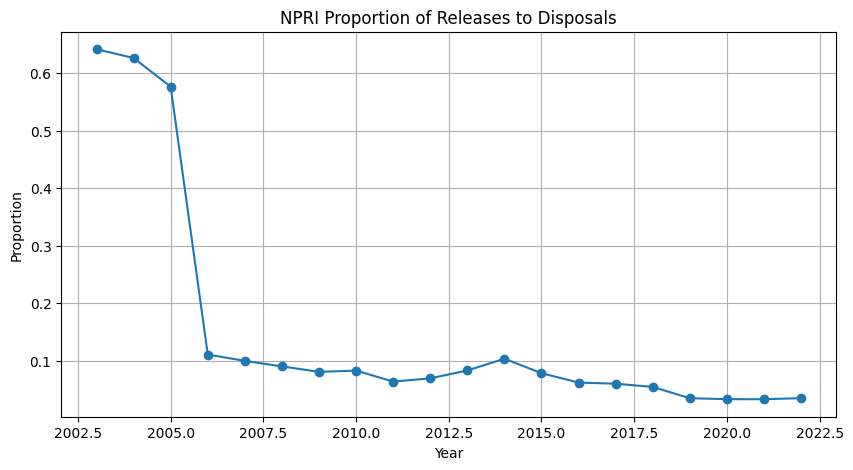

In [ ]:
# Plot full proportion trend across years
plt.figure(figsize=(10,5))
plt.plot(model_df["Year"], model_df["Proportion"], marker="o")
plt.title("NPRI Proportion of Releases to Disposals")
plt.xlabel("Year")
plt.ylabel("Proportion")
plt.grid()
plt.show()


6. Visual 2: 3-Year Rolling Proportion

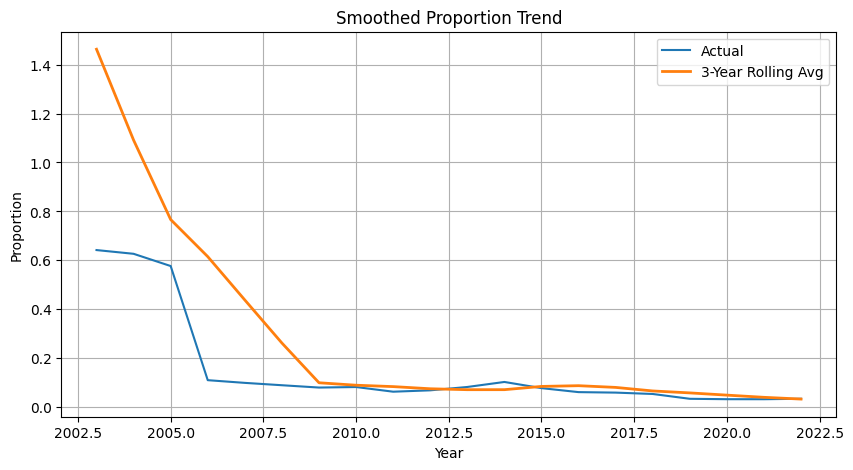

In [ ]:
# Plot actual values and smoothed 3-year rolling average
plt.figure(figsize=(10,5))
plt.plot(model_df["Year"], model_df["Proportion"], label="Actual")
plt.plot(model_df["Year"], model_df["Rolling_3yr"],
         label="3-Year Rolling Avg", linewidth=2)

plt.title("Smoothed Proportion Trend")
plt.xlabel("Year")
plt.ylabel("Proportion")
plt.legend()
plt.grid()
plt.show()


7. Train Linear Regression Model

In [ ]:
# Select engineered features
feature_cols = ["Lag_1", "Rolling_3yr", "Difference", "Percent_Change"]

X = model_df[feature_cols]
y = model_df["Proportion"]

# Build linear regression
model = LinearRegression()
model.fit(X, y)

# Add predictions back to dataframe
model_df["Predicted"] = model.predict(X)

# Evaluate in-sample performance
mae = mean_absolute_error(y, model_df["Predicted"])
r2 = r2_score(y, model_df["Predicted"])

print("MAE:", mae)
print("R²:", r2)


MAE: 0.03744087286812965
R²: 0.8996240811706293


/tmp/ipython-input-1867497985.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df["Predicted"] = model.predict(X)


8. Train Linear Regression Model With Train/Test Split

In [ ]:
# Select features and target for train/test sets
feature_cols = ["Lag_1", "Rolling_3yr", "Difference", "Percent_Change"]

X_train = train_df[feature_cols]
y_train = train_df["Proportion"]

X_test  = test_df[feature_cols]
y_test  = test_df["Proportion"]

# Train linear regression model
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

# Make predictions for both train and test sets
train_df["Predicted"] = lin_model.predict(X_train)
test_df["Predicted"]  = lin_model.predict(X_test)

# Combine for plotting and residual analysis
model_df_split = pd.concat([train_df, test_df], ignore_index=True)

from sklearn.metrics import mean_absolute_error, r2_score

train_mae = mean_absolute_error(y_train, train_df["Predicted"])
test_mae  = mean_absolute_error(y_test,  test_df["Predicted"])

train_r2 = r2_score(y_train, train_df["Predicted"])
test_r2  = r2_score(y_test,  test_df["Predicted"])

# Print results
print(f"Train MAE: {train_mae:.4f}")
print(f"Test  MAE: {test_mae:.4f}")
print(f"Train R² : {train_r2:.4f}")
print(f"Test  R² : {test_r2:.4f}")

Train MAE: 0.0449
Test  MAE: 0.0121
Train R² : 0.8912
Test  R² : -379.9373


9. Visual 3 — Actual vs Predicted (Time-Based Split)

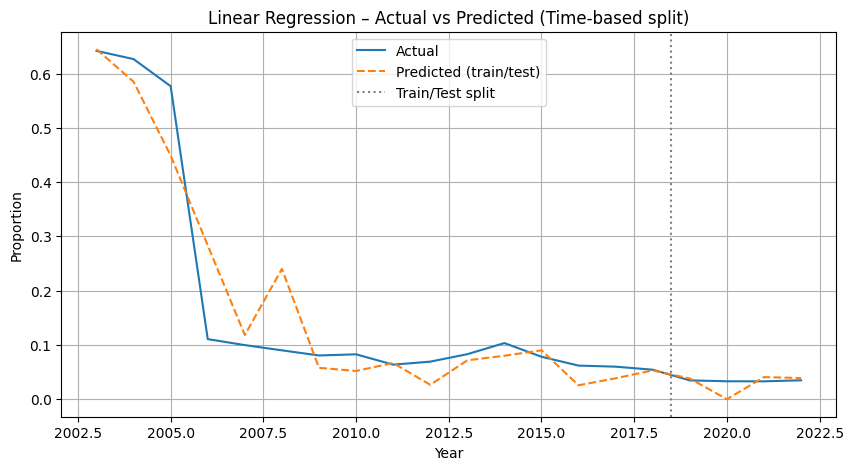

In [ ]:
plt.figure(figsize=(10,5))

plt.plot(model_df_split["Year"], model_df_split["Proportion"],
         label="Actual")
plt.plot(model_df_split["Year"], model_df_split["Predicted"],
         linestyle="--", label="Predicted (train/test)")

# vertical line where test starts
split_year = test_df["Year"].min()
plt.axvline(split_year - 0.5, color="gray", linestyle=":",
            label="Train/Test split")

plt.title("Linear Regression – Actual vs Predicted (Time-based split)")
plt.xlabel("Year")
plt.ylabel("Proportion")
plt.legend()
plt.grid()
plt.show()

10. Residual Error Plot (Baseline Model)

/tmp/ipython-input-1525328004.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df["Residual"] = y - model_df["Predicted"]


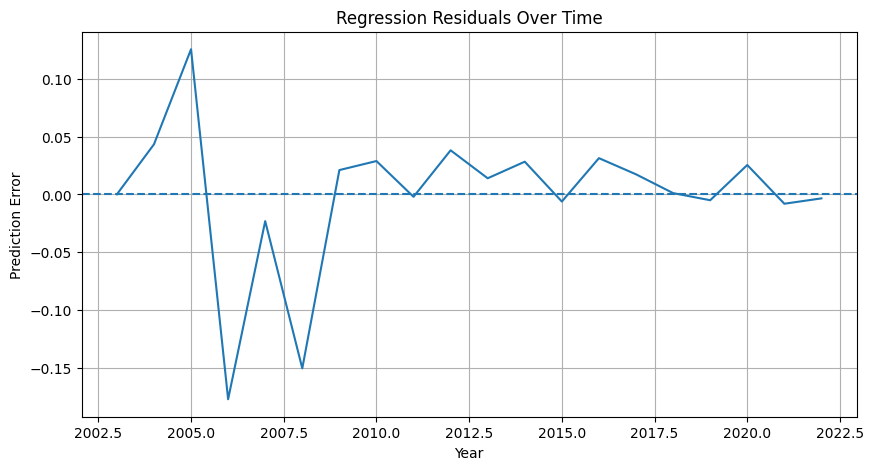

In [ ]:
model_df["Residual"] = y - model_df["Predicted"]

plt.figure(figsize=(10,5))
plt.plot(model_df["Year"], model_df["Residual"])
plt.axhline(0, linestyle="--")

plt.title("Regression Residuals Over Time")
plt.xlabel("Year")
plt.ylabel("Prediction Error")
plt.grid()
plt.show()


11. 5-Year Forecast (Final Goal)

In [ ]:
# Take the last row of feature values as the starting point
last_row = model_df[X.columns].iloc[-1].values.reshape(1,-1)

future_predictions = []

current_features = last_row
# Predict the next 5 years
for _ in range(5):
    pred = model.predict(current_features)[0]
    future_predictions.append(pred)

   # Shift features and insert the new prediction
    current_features = np.roll(current_features, -1)
    current_features[0][-1] = pred

# Create year labels for the next 5 years
future_years = list(range(int(model_df["Year"].max())+1,
                            int(model_df["Year"].max())+6))

# Build forecast dataframe
forecast_df = pd.DataFrame({
    "Year": future_years,
    "Predicted_Proportion": future_predictions
})

forecast_df


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


,Year,Predicted_Proportion
0,2023,0.037902
1,2024,0.001480
2,2025,0.039935
3,2026,0.074292
4,2027,0.026332


12. Visual 4: 5-Year Forecast Plot

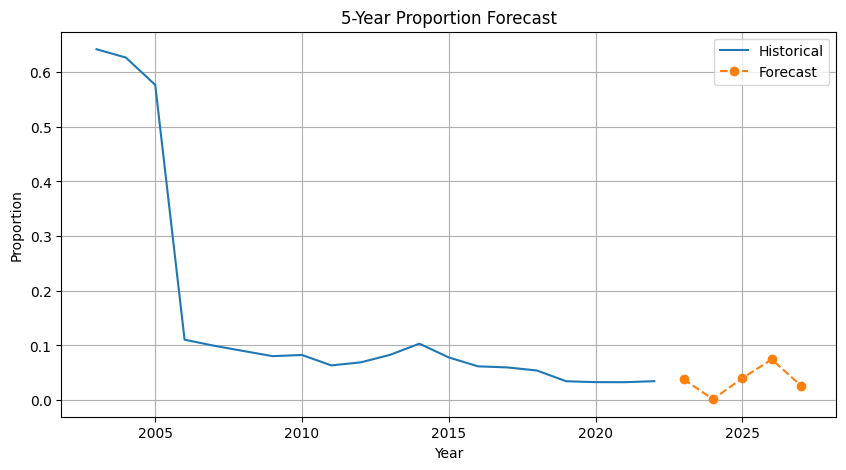

In [ ]:
plt.figure(figsize=(10,5))

# Historical proportion values
plt.plot(model_df["Year"], model_df["Proportion"], label="Historical")

# Forecasted values for the next 5 years
plt.plot(forecast_df["Year"], forecast_df["Predicted_Proportion"],
         marker="o", linestyle="--", label="Forecast")

plt.title("5-Year Proportion Forecast")
plt.xlabel("Year")
plt.ylabel("Proportion")
plt.legend()
plt.grid()
plt.show()


# Phase 2 - Explanation and Justification

## Dataset Refinement

For Phase 2, we turned the NPRI data into a yearly table.

*From the releases sheet, we summed all types of releases by year → Total Releases.

*From the disposals sheet, we summed all disposals and transfers by year → Total Disposals.

*Then we made one row per year and calculated:

**Proportion = Total Releases ÷ Total Disposals**

This proportion is our target. Missing values during aggregation were treated as 0, and rows with missing lag/rolling values (at the start) were removed before modeling.



## Feature Engineering
In Phase 2, we turned our Phase 1 ideas (trend and change over time) into numeric features based only on past years:

***Lag_1** – last year’s proportion.

***Rolling_3yr** – 3-year rolling average from past lag values (smooth trend).

***Difference** – change between the last two lagged proportions.

***Percent_Change** – relative change between the last two lagged proportions.

We first had leakage when we used the current year inside features, so we fixed it and now all features use only past proportions, like real forecasting.



## Regression Model and Train/Test Split

We used Linear Regression because it is simple, works with small datasets, and shows how past values relate to the current proportion.

**To evaluate fairly, we did a time-based split:**

*Sorted by year,
*Used about 80% earliest years as train,
*Used the most recent years as test.

**We reported:**

*MAE – average prediction error size,
*R² – how much variation is explained.

**With the corrected features:**

*Train MAE ≈ 0.045, Train R² ≈ 0.89 → model fits training years quite well.

*Test MAE ≈ 0.012, Test R² very negative → small test set with low variation makes R² unstable, so future predictions are not perfect and must be interpreted carefully.



# Visuals

We used plots to check and explain each step:

***Trend Plot** – shows proportion by year and confirms a time-series pattern.

***Rolling-Average Plot** – shows raw vs 3-year rolling proportion and supports using smoothed features.

***Actual vs Predicted Plot (with split)** – compares true vs predicted values and shows where train ends and test starts.

***Residual Plot (baseline)** – shows errors over time and checks if they are roughly centered around zero.

***Forecast Plot** – shows historical data plus 5-year predictions, directly answering the project’s forecasting question.

Each visual helps us justify our data processing, feature choices, and how well (or poorly) the model works.



# Five-Year Forecast

After training the model, we used it to predict the next five years beyond the last NPRI year. We used the most recent lag and rolling features, then predicted the next year’s proportion. For multi-year forecasting, each predicted value becomes part of the “past” when we generate the next prediction (recursive forecasting).

The forecast suggests that the proportion of releases to disposals is likely to stay low and follow a similar direction as the last few historical years. This roughly matches what we saw in Phase 1: releases do not grow dramatically compared to disposals and may continue to slowly decline or stay stable.

Because the dataset is small and the test R² is unstable, we treat these forecasts as rough guidance rather than exact numbers.



# Reflection

Phase 1 and Phase 2 are connected. In Phase 1, we used our own thinking to look at trends, rolling averages, and changes over time, and we made a manual prediction. In Phase 2, we turned the same ideas into a proper ML pipeline by creating a yearly dataset, adding lag and rolling features, doing a time-based train/test split, and training a Linear Regression model.

During Phase 2 we also learned about data leakage. At first our model was too perfect, so we realized our features were using the current-year proportion. After fixing this and using only past values, the results became more realistic. The final model shows that our manual reasoning from Phase 1 can be translated into features for a regression model, but it also reminds us that forecasting with a small time-series dataset is difficult and the predictions should be used with caution.
